In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

Stage:a character string denoting reproductive stage at sampling

Clutch Completion:a character string denoting if the study nest observed with a full clutch, i.e., 2 eggs

Date Egg:a date denoting the date study nest observed with 1 egg (sampled)

Culmen Length:a number denoting the length of the dorsal ridge of a bird's bill (millimeters)

Culmen Depth:a number denoting the depth of the dorsal ridge of a bird's bill (millimeters)

Flipper Length:an integer denoting the length penguin flipper (millimeters)

Sex:a character string denoting the sex of an animal

In [2]:
df=pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\penguins_lter.csv')
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11-11-2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11-11-2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [86]:
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [87]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [88]:
df['Species'].unique()

array(['Adelie Penguin  ', 'Chinstrap penguin   ', 'Gentoo penguin  '],
      dtype=object)

In [89]:
df['Region'].unique()

array(['Anvers'], dtype=object)

In [90]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

# plotting graph

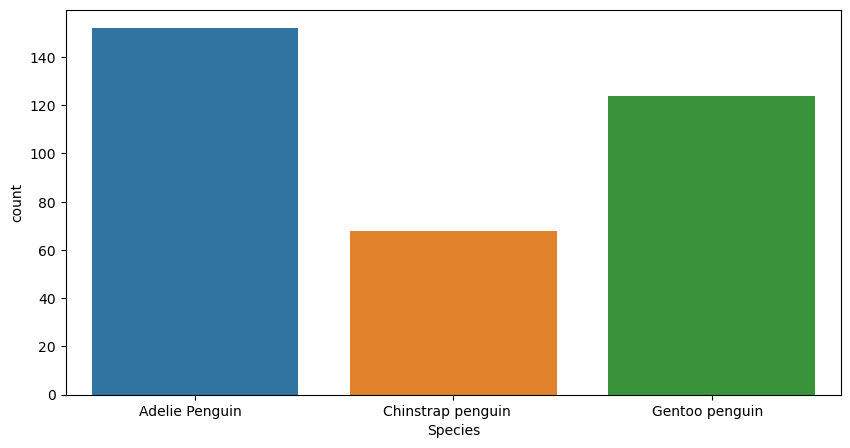

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x='Species',data=df)
plt.show()

In [94]:
df['Species'].value_counts()

Adelie Penguin          152
Gentoo penguin          124
Chinstrap penguin        68
Name: Species, dtype: int64

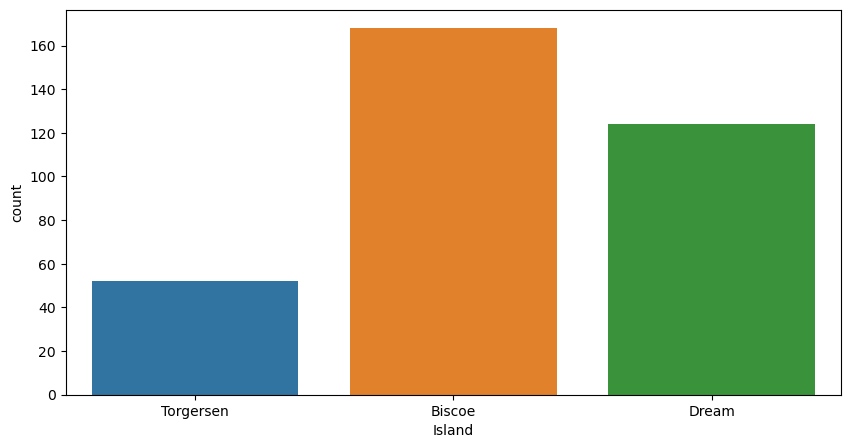

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='Island',data=df)
plt.show()

In [96]:
df['Island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

In [97]:
df['Sex'].value_counts()

MALE      169
FEMALE    165
Name: Sex, dtype: int64

In [98]:
df['Sex'].fillna(df['Sex'].mode(),inplace=True)

<AxesSubplot:xlabel='Island', ylabel='Body Mass (g)'>

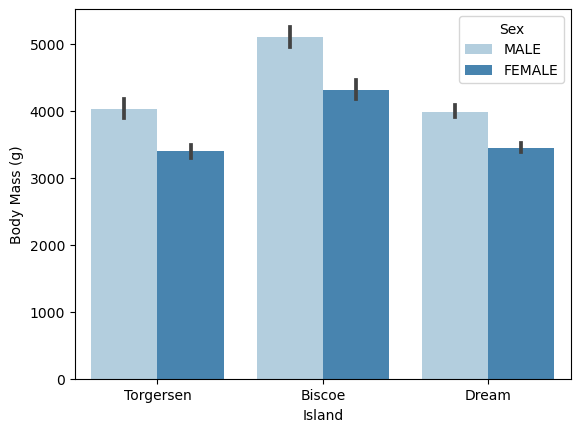

In [43]:
sns.barplot(data=df, x="Island", y="Body Mass (g)", hue="Sex",palette = "Blues")

In [99]:
df['Sex'].mode()

0    MALE
Name: Sex, dtype: object

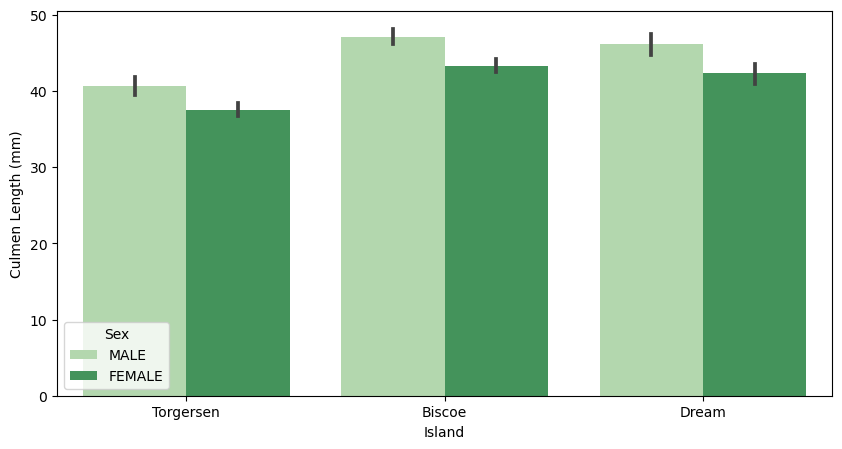

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Island", y="Culmen Length (mm)", hue="Sex",palette = "Greens")
plt.show()

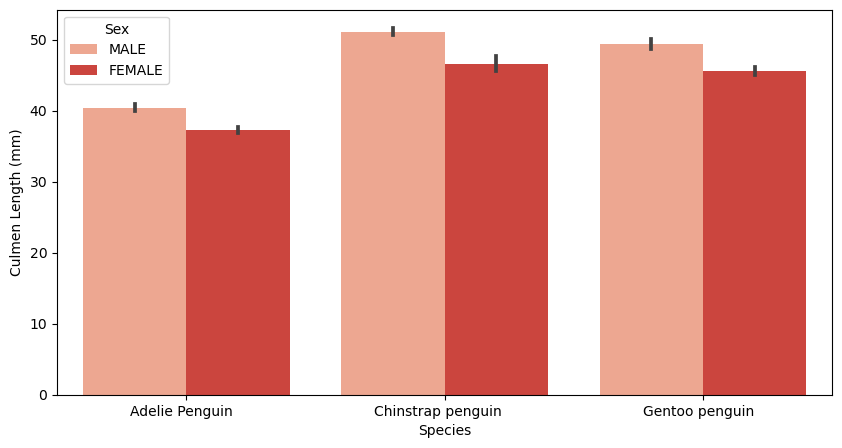

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Species", y="Culmen Length (mm)", hue="Sex",palette = "Reds")
plt.show()

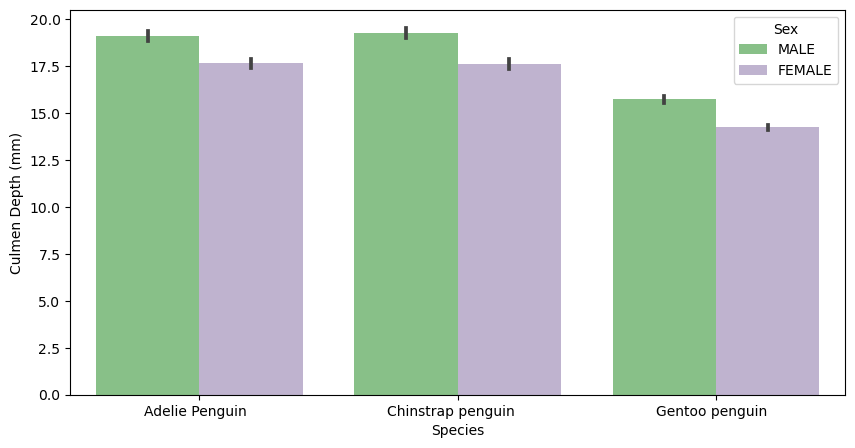

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Species", y="Culmen Depth (mm)", hue="Sex",palette = "Accent")
plt.show()

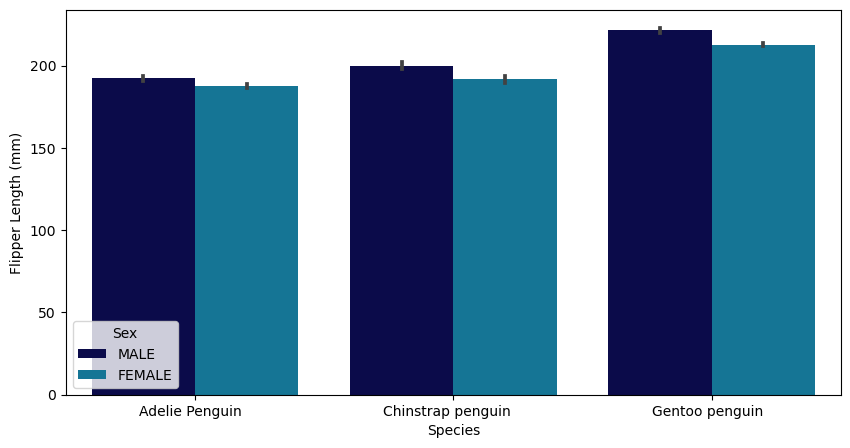

In [133]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Species", y="Flipper Length (mm)", hue="Sex",palette = "ocean")
plt.show()

In [100]:
df['Clutch Completion'].value_counts()

Yes    308
No      36
Name: Clutch Completion, dtype: int64

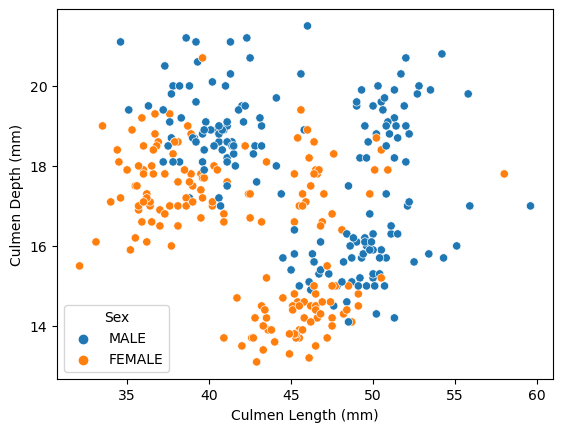

In [46]:
sns.scatterplot(x='Culmen Length (mm)',y='Culmen Depth (mm)',data=df,hue='Sex')
plt.show()

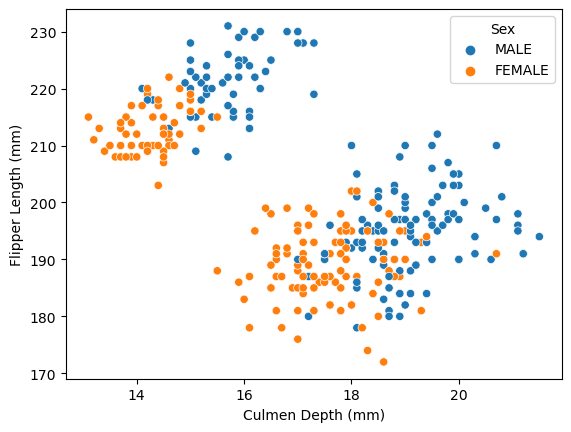

In [47]:
sns.scatterplot(x='Culmen Depth (mm)',y='Flipper Length (mm)',data=df,hue='Sex')
plt.show()

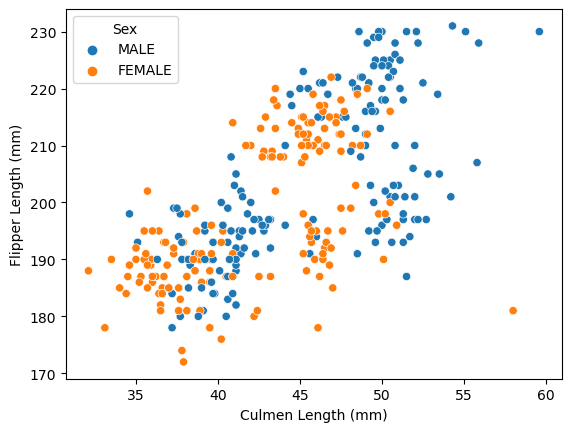

In [48]:
sns.scatterplot(x='Culmen Length (mm)',y='Flipper Length (mm)',data=df,hue='Sex')
plt.show()

In [3]:
df.drop(columns=['studyName','Sample Number','Stage','Individual ID','Clutch Completion','Delta 15 N (o/oo)','Delta 13 C (o/oo)'],inplace=True)


In [102]:
df.head()

,Species,Region,Island,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,Adelie Penguin,Anvers,Torgersen,11-11-2007,39.1,18.7,181.0,3750.0,MALE,Not enough blood for isotopes.
1,Adelie Penguin,Anvers,Torgersen,11-11-2007,39.5,17.4,186.0,3800.0,FEMALE,NaN
2,Adelie Penguin,Anvers,Torgersen,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,NaN
3,Adelie Penguin,Anvers,Torgersen,11/16/07,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,Adelie Penguin,Anvers,Torgersen,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,NaN


In [4]:
df.drop(['Comments','Date Egg'],inplace=True,axis=1)

In [5]:
df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean(),inplace=True)

In [6]:
df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean(),inplace=True)

In [7]:
df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean(),inplace=True)

In [8]:
df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean(),inplace=True)

In [9]:
df

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin,Anvers,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie Penguin,Anvers,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie Penguin,Anvers,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie Penguin,Anvers,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie Penguin,Anvers,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...,...
339,Gentoo penguin,Anvers,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN
340,Gentoo penguin,Anvers,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo penguin,Anvers,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo penguin,Anvers,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


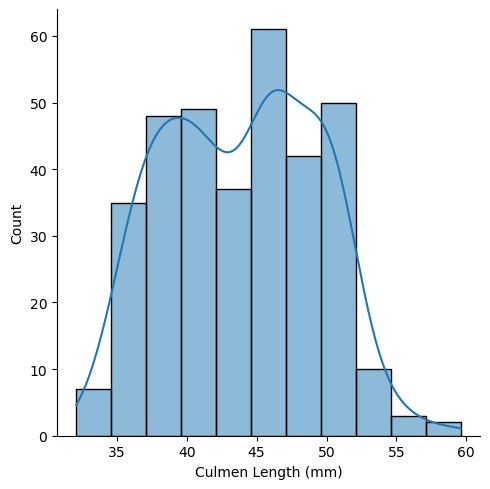

0.053271788831634054

In [10]:
#checking the Normalization
sns.displot(x='Culmen Length (mm)',data=df,kde=True)
plt.show()
df['Culmen Length (mm)'].skew()

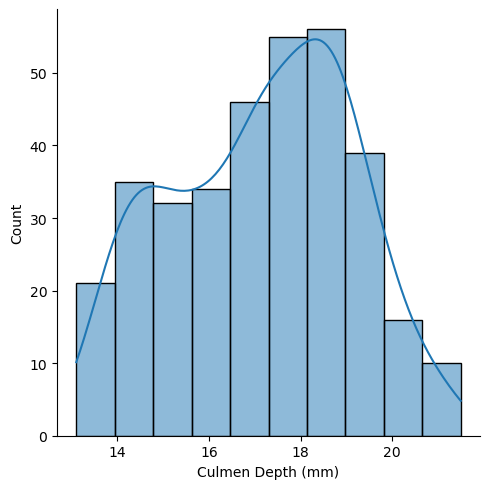

-0.1438798068350749

In [11]:
sns.displot(x='Culmen Depth (mm)',data=df,kde=True)
plt.show()
df['Culmen Depth (mm)'].skew()

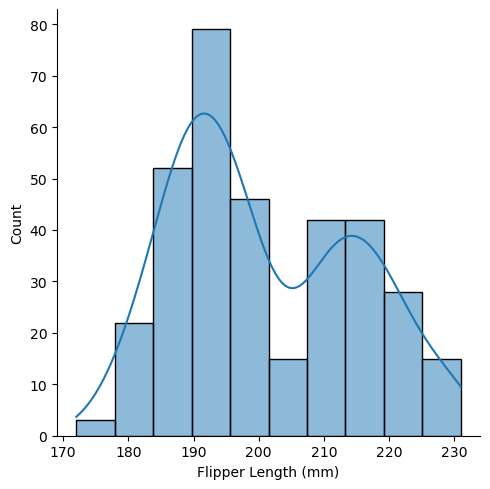

0.34668222408256033

In [12]:
sns.displot(x='Flipper Length (mm)',data=df,kde=True)
plt.show()
df['Flipper Length (mm)'].skew()

# spliting the data

In [13]:
x=df.drop('Species',axis=1)
y=df['Species']

# converting the categorical values into the numeric values

In [14]:
x=pd.get_dummies(x,drop_first=True)
x

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,1,0
4,36.70000,19.30000,193.000000,3450.000000,0,1,0
...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0,0,0
340,46.80000,14.30000,215.000000,4850.000000,0,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,0,0


# Dropping the Island column coz this is data from only one island

In [15]:
x.drop('Island_Torgersen',axis=1,inplace=True)
x

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Sex_MALE
0,39.10000,18.70000,181.000000,3750.000000,0,1
1,39.50000,17.40000,186.000000,3800.000000,0,0
2,40.30000,18.00000,195.000000,3250.000000,0,0
3,43.92193,17.15117,200.915205,4201.754386,0,0
4,36.70000,19.30000,193.000000,3450.000000,0,0
...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,0,0
340,46.80000,14.30000,215.000000,4850.000000,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,1
342,45.20000,14.80000,212.000000,5200.000000,0,0


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((240, 6), (104, 6), (240,), (104,))

# Decision Tree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dt=DecisionTreeClassifier()

In [115]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
y_test_pred=dt.predict(x_test)
y_train_pred=dt.predict(x_train)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_train,y_train_pred)

1.0

In [119]:
accuracy_score(y_test,y_test_pred)

0.9519230769230769

In [120]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt,x_test,y_test)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [34]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[0.98550725 0.98550725 0.98550725 0.95652174 0.94117647]
The mean Cross-Validation score is: 0.9708439897698211


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

                      precision    recall  f1-score   support

    Adelie Penguin         1.00      0.94      0.97        50
Chinstrap penguin          0.86      0.95      0.90        20
    Gentoo penguin         0.94      0.97      0.96        34

            accuracy                           0.95       104
           macro avg       0.94      0.95      0.94       104
        weighted avg       0.96      0.95      0.95       104



In [37]:
dt.feature_importances_

array([0.35416616, 0.0975353 , 0.52709828, 0.02120026, 0.        ,
       0.        ])

# with this we can see that our 5th and 6th column is not important for predicting the result

In [38]:
# Visualzing the Tree
from sklearn.tree import plot_tree

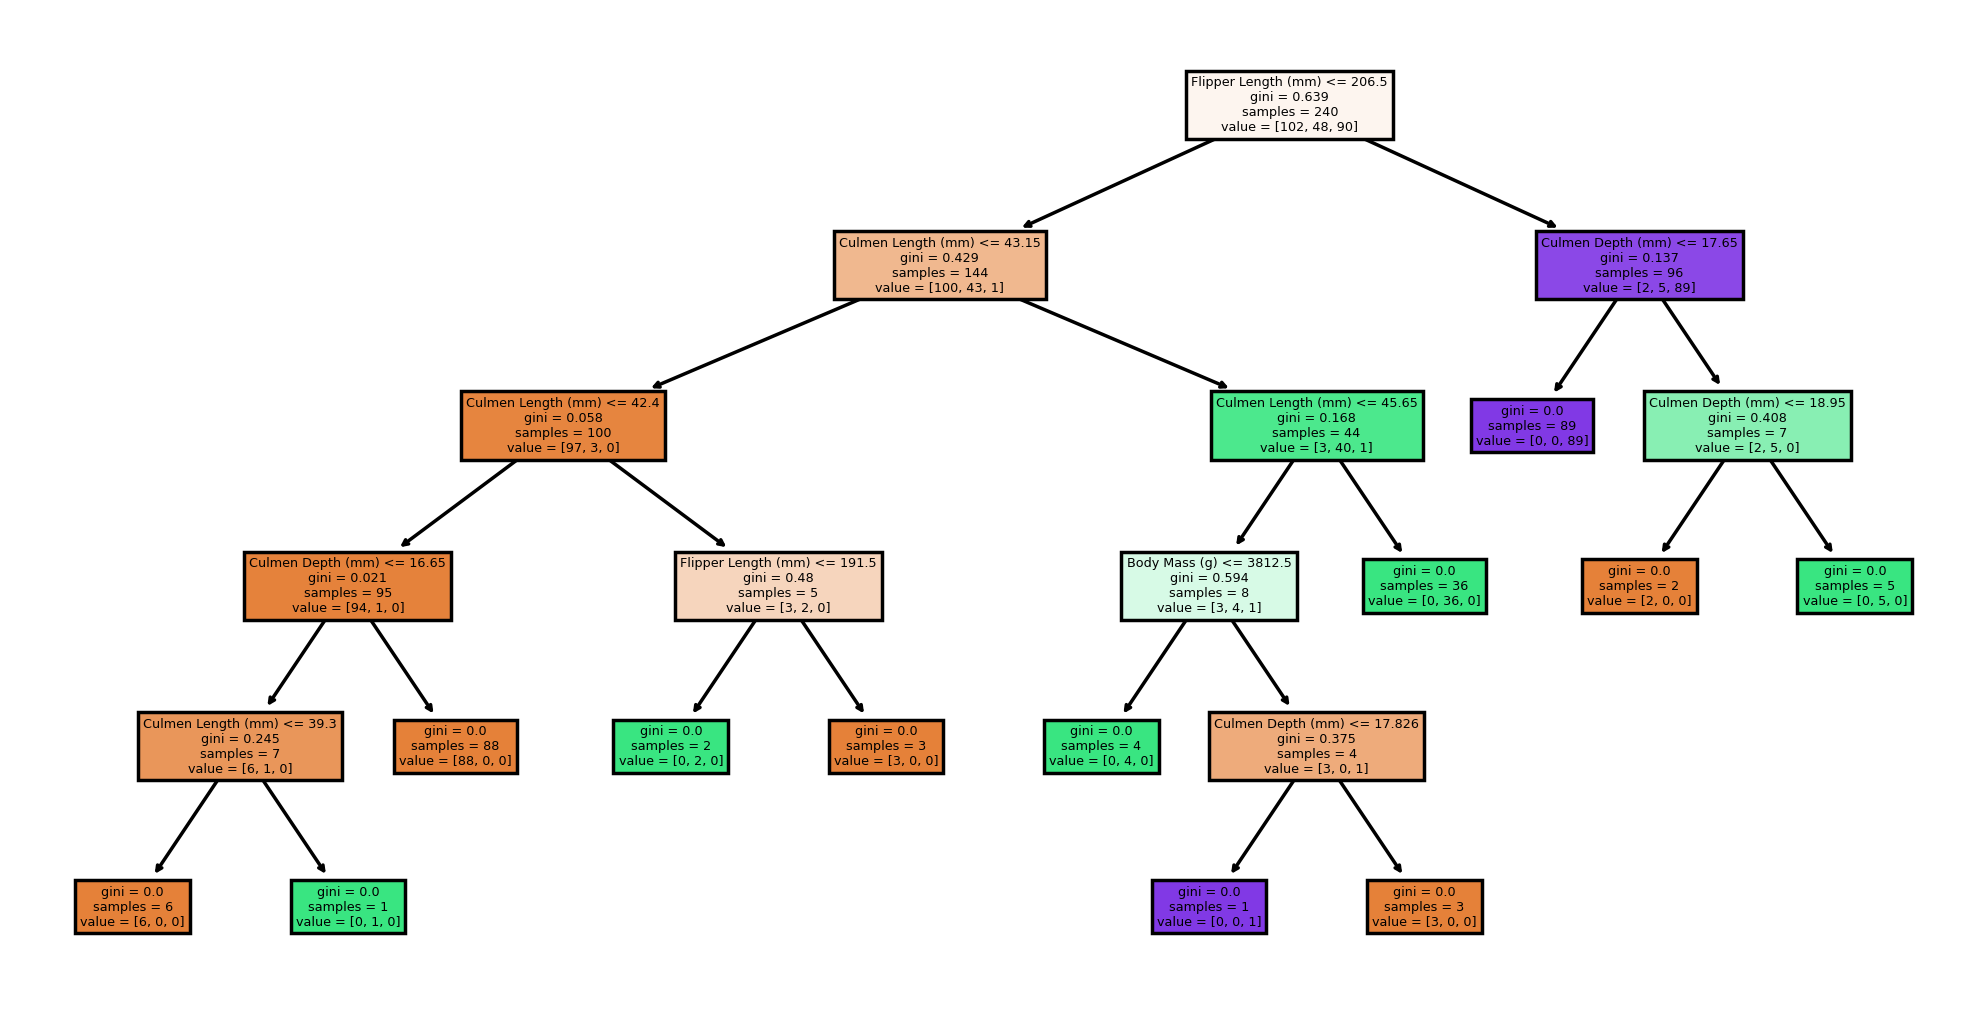

In [41]:
plt.figure(figsize=(10,5),dpi=250)
plot_tree(dt,filled=True,feature_names=x.columns)
plt.show()

# Random_forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
#predicting
y_test_pred=RF.predict(x_test)
y_train_pred=RF.predict(x_train)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

1.0

In [47]:
accuracy_score(y_test,y_test_pred)

0.9903846153846154

In [48]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[0.98550725 0.95652174 0.97101449 0.95652174 0.94117647]
The mean Cross-Validation score is: 0.962148337595908


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

                      precision    recall  f1-score   support

    Adelie Penguin         1.00      0.98      0.99        50
Chinstrap penguin          1.00      1.00      1.00        20
    Gentoo penguin         0.97      1.00      0.99        34

            accuracy                           0.99       104
           macro avg       0.99      0.99      0.99       104
        weighted avg       0.99      0.99      0.99       104



C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


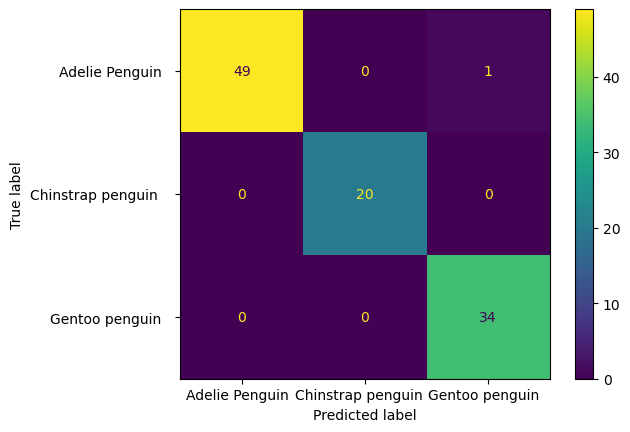

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF,x_test,y_test)

In [18]:
# hyper-parameter Tuning
from sklearn.model_selection import GridSearchCV
estimator=RandomForestClassifier()
param_grid={'n_estimators':list(range(1,101))}

In [19]:
grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [20]:
grid.best_params_

{'n_estimators': 22}

In [24]:
#re-building the model:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=22)
RF.fit(x_train,y_train)

RandomForestClassifier(n_estimators=22)

In [25]:
#predicting
y_test_pred=RF.predict(x_test)
y_train_pred=RF.predict(x_train)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

1.0

In [27]:
accuracy_score(y_test,y_test_pred)

0.9903846153846154

In [29]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(RF,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[0.98550725 0.97101449 0.98550725 1.         0.98529412]
The mean Cross-Validation score is: 0.9854646206308612


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

                      precision    recall  f1-score   support

    Adelie Penguin         1.00      0.98      0.99        50
Chinstrap penguin          1.00      1.00      1.00        20
    Gentoo penguin         0.97      1.00      0.99        34

            accuracy                           0.99       104
           macro avg       0.99      0.99      0.99       104
        weighted avg       0.99      0.99      0.99       104



C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


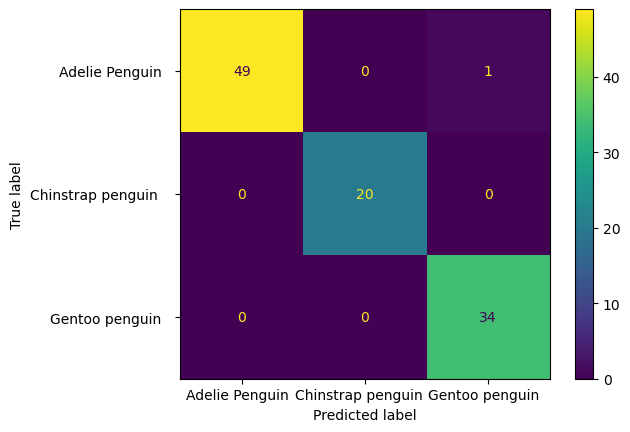

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF,x_test,y_test)

# suppert Vector machine

In [32]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)


SVC()

In [33]:
#predicting
y_test_pred=svm.predict(x_test)
y_train_pred=svm.predict(x_train)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7416666666666667

In [35]:
accuracy_score(y_test,y_test_pred)

0.7115384615384616

# AdaBoostCLassifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)

AdaBoostClassifier()

In [41]:
#predicting
y_test_pred=Ada.predict(x_test)
y_train_pred=Ada.predict(x_train)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.9666666666666667

In [43]:
accuracy_score(y_test,y_test_pred)

0.9519230769230769

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


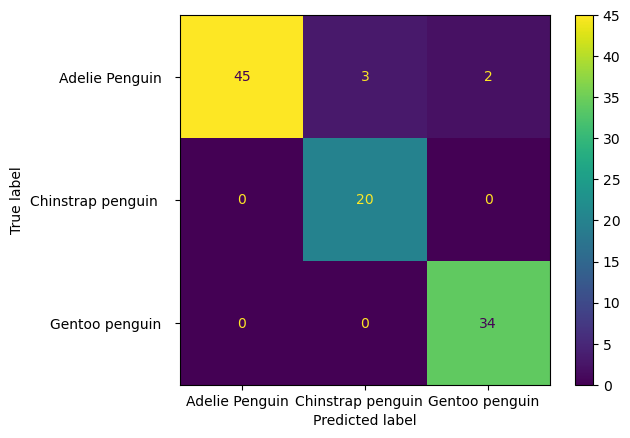

In [45]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Ada,x_test,y_test)

In [47]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Ada,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[0.98550725 0.7826087  0.8115942  0.94202899 0.77941176]
The mean Cross-Validation score is: 0.8602301790281329


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

                      precision    recall  f1-score   support

    Adelie Penguin         1.00      0.90      0.95        50
Chinstrap penguin          0.87      1.00      0.93        20
    Gentoo penguin         0.94      1.00      0.97        34

            accuracy                           0.95       104
           macro avg       0.94      0.97      0.95       104
        weighted avg       0.96      0.95      0.95       104



# KNN

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [127]:
#prediction
y_test_pred=knn_model.predict(x_test)
y_train_pred=knn_model.predict(x_train)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.8375

In [129]:
accuracy_score(y_test,y_test_pred)

0.7692307692307693

In [134]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,x_test,y_test)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [135]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[0.71014493 0.79710145 0.71014493 0.82608696 0.89705882]
The mean Cross-Validation score is: 0.7881074168797955


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

                      precision    recall  f1-score   support

    Adelie Penguin         0.74      0.86      0.80        50
Chinstrap penguin          0.56      0.25      0.34        20
    Gentoo penguin         0.86      0.94      0.90        34

            accuracy                           0.77       104
           macro avg       0.72      0.68      0.68       104
        weighted avg       0.75      0.77      0.74       104



# Hyper-parameter tuning

In [145]:
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()

In [146]:
param_grid={'n_neighbors':list(range(1,31)),'p':[1,2]} #here 1=Manhatten distance .....2=Euclidian distance
full_cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

In [147]:
full_cv_classifier.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy')

In [148]:
full_cv_classifier.best_params_ #now we know that no of neighbour we have to consider is 1 and we have to use Manhatten distance

{'n_neighbors': 1, 'p': 1}

# Remodeling the KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1,p=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [154]:
#prediction
y_test_pred=knn_model.predict(x_test)
y_train_pred=knn_model.predict(x_train)

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

1.0

In [156]:
accuracy_score(y_test,y_test_pred)

0.7884615384615384

In [157]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,x_test,y_test)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [158]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_model,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('The mean Cross-Validation score is:',cv_score)

[0.7826087  0.85507246 0.84057971 0.88405797 0.94117647]
The mean Cross-Validation score is: 0.860699062233589


In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

                      precision    recall  f1-score   support

    Adelie Penguin         0.83      0.78      0.80        50
Chinstrap penguin          0.57      0.65      0.60        20
    Gentoo penguin         0.88      0.88      0.88        34

            accuracy                           0.79       104
           macro avg       0.76      0.77      0.76       104
        weighted avg       0.80      0.79      0.79       104

